In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
##Data Exploration and Cleaning

In [3]:
data=pd.read_csv('startupfund.csv')
data.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,15-12-2020,Bira 91,Food and Beverage,Craft Beer,New Delhi,"Nishant Mittal, Pankaj Chaddah and Shikha Suni...",Funding,"12,73,634.07",NaN
1,2,21-12-2020,Pine Labs,Financial Services,Payment Solutions Provider,Noida,Lone Pine Capital,Secondary Market,Undisclosed,NaN
2,3,15-12-2020,Zenoti,Technology Provider,Cloud-based software provider for the spa and ...,Washington,Advent International,Series D,"16,00,00,000",NaN
3,4,22-12-2020,Tax Buddy India,FinTech,Online tax adviser,Mumbai,Zenith Global,Seed,"10,00,000",NaN
4,5,15-12-2020,Delhivery,Supply chain,Transportation,Gurgaon,Steadview Capital,Secondary Market,"2,50,00,000",NaN


In [4]:
data.shape

(3158, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3158 non-null   int64 
 1   Date dd/mm/yyyy    3158 non-null   object
 2   Startup Name       3158 non-null   object
 3   Industry Vertical  2987 non-null   object
 4   SubVertical        2222 non-null   object
 5   City  Location     2978 non-null   object
 6   Investors Name     3134 non-null   object
 7   InvestmentnType    3150 non-null   object
 8   Amount in USD      2184 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 246.8+ KB


In [6]:
data.rename(columns={'Startup Name': 'StartupName', 'Industry Vertical': 'Industry', 'City  Location': 'CityLocation', 'Investors Name': 'InvestorName', 'InvestmentnType': 'InvestmentType', 'Amount in USD': 'Amount'}, inplace=True)
data.head()

,Sr No,Date dd/mm/yyyy,StartupName,Industry,SubVertical,CityLocation,InvestorName,InvestmentType,Amount,Remarks
0,1,15-12-2020,Bira 91,Food and Beverage,Craft Beer,New Delhi,"Nishant Mittal, Pankaj Chaddah and Shikha Suni...",Funding,"12,73,634.07",NaN
1,2,21-12-2020,Pine Labs,Financial Services,Payment Solutions Provider,Noida,Lone Pine Capital,Secondary Market,Undisclosed,NaN
2,3,15-12-2020,Zenoti,Technology Provider,Cloud-based software provider for the spa and ...,Washington,Advent International,Series D,"16,00,00,000",NaN
3,4,22-12-2020,Tax Buddy India,FinTech,Online tax adviser,Mumbai,Zenith Global,Seed,"10,00,000",NaN
4,5,15-12-2020,Delhivery,Supply chain,Transportation,Gurgaon,Steadview Capital,Secondary Market,"2,50,00,000",NaN


In [7]:
###Cleaning date column and extracting month and year values from date

In [8]:
data['Date dd/mm/yyyy']=data['Date dd/mm/yyyy'].map(lambda x:str(x).replace('-',''))
data['Date dd/mm/yyyy']=data['Date dd/mm/yyyy'].map(lambda x:str(x).replace('/',''))

In [9]:
data['Date']=pd.to_datetime(data['Date dd/mm/yyyy'],format='%d%m%Y',errors='coerce')
data['Year']=pd.DatetimeIndex(data['Date']).year
data['Month']=pd.DatetimeIndex(data['Date']).month

In [10]:
###Converting values in Amount column from string to float 

In [11]:
def isnum(x):
    try:
        x=int(str(x).replace(',',''))
    except:
        x=str(x).replace(',','')
    if isinstance(x,int):
        return x
    else:
        return 0

In [12]:
data['Amount']=data['Amount'].map(isnum)

In [13]:
def amount(x):
    if x<=1000000:
        return '0-10L'
    elif x<=5000000:
        return '10L-50L'
    elif x<=10000000:
        return '50L-1C'
    elif x<=20000000:
        return '1C-2C'
    elif x<=50000000:
        return '2C-5C'
    elif x<=100000000:
        return '5C-10C'
    elif x<=200000000:
        return '10C-20C'
    elif x<=400000000:
        return '20C-40C'
    elif x<=1000000000:
        return '40C-100C'
    elif x<=2000000000:
        return '100C-200C'
    elif x<=3000000000:
        return '200C-300C'
    else:
        return '300C+'

In [14]:
data['Investment Range in USD']=data['Amount'].map(amount)

In [15]:
###Cleaning column CityLocation

In [16]:
data['CityLocation']=data['CityLocation'].map(lambda x: 'New Delhi' if (str(x)=='\\\\xc2\\\\xa0New Delhi') else x)
data['CityLocation']=data['CityLocation'].map(lambda x: 'Bangalore' if (str(x)=='Bengaluru') else x)
data['CityLocation']=data['CityLocation'].map(lambda x: 'Gurugram' if (str(x)=='Gurgaon' or str(x)=='\\\\xc2\\\\xa0Gurgaon') else x)
data['CityLocation']=data['CityLocation'].map(lambda x: 'Noida' if (str(x)=='\\\\xc2\\\\xa0Noida') else x)

In [17]:
###Cleaning column Industry

In [18]:
data['Industry']=data['Industry'].map(lambda x: 'E-Commerce' if (str(x)=='eCommerce' or str(x)=='ECommerce' or str(x)=='E-commerce' or str(x)=='Ecommerce' or str(x)=='ecommerce' or str(x)=='E-Commerce') else x)
data['Industry']=data['Industry'].map(lambda x: 'Education' if (str(x)=='Education' or str(x)=='Ed-Tech' or str(x)=='Online Education Platform' or str(x)=='EdTech' or str(x)=='Edtech') else x)
data['Industry']=data['Industry'].map(lambda x: 'Fintech' if (str(x)=='FinTech' or str(x)=='Fin-Tech' or str(x)=='Financial Tech') else x)
data['Industry']=data['Industry'].map(lambda x: 'Food & Beverage' if(str(x)=='Food & Beverage' or str(x)=='Food and Beverage' or str(x)=='Food' or str(x)=='Food & Beverages' or str(x)=='Food and Beverages') else x)
data['Industry']=data['Industry'].map(lambda x: 'Transport' if(str(x)=='Transportation') else x)
data['Industry']=data['Industry'].map(lambda x: 'Healthcare' if(str(x)=='Health and Wellness' or str(x)=='Health Care') else x)

In [19]:
data['StartupName']=data['StartupName'].map(lambda x: 'Byju' if(str(x)=='Byjuâ€™s') else x)
data['StartupName']=data['StartupName'].map(lambda x: 'Flipkart' if(str(x)=='Flipkart.com') else x)
data['StartupName']=data['StartupName'].map(lambda x:'Ola' if(str(x)=='Ola Cabs') else x)

In [20]:
data['InvestorName']=data['InvestorName'].map(lambda x: 'Undisclosed Investors' if(str(x)=='Undisclosed investors' or str(x)=='Undisclosed Investor' or str(x)=='undisclosed investors' or str(x)=='Undisclosed' or str(x)=='Undisclosed investor') else x)

In [21]:
###Drop Sr.No and remarks column

In [22]:
data.drop(columns=['Sr No','Remarks','Date dd/mm/yyyy'],inplace=True)

In [23]:
data.head()

,StartupName,Industry,SubVertical,CityLocation,InvestorName,InvestmentType,Amount,Date,Year,Month,Investment Range in USD
0,Bira 91,Food & Beverage,Craft Beer,New Delhi,"Nishant Mittal, Pankaj Chaddah and Shikha Suni...",Funding,0,2020-12-15,2020.0,12.0,0-10L
1,Pine Labs,Financial Services,Payment Solutions Provider,Noida,Lone Pine Capital,Secondary Market,0,2020-12-21,2020.0,12.0,0-10L
2,Zenoti,Technology Provider,Cloud-based software provider for the spa and ...,Washington,Advent International,Series D,160000000,2020-12-15,2020.0,12.0,10C-20C
3,Tax Buddy India,Fintech,Online tax adviser,Mumbai,Zenith Global,Seed,1000000,2020-12-22,2020.0,12.0,0-10L
4,Delhivery,Supply chain,Transportation,Gurugram,Steadview Capital,Secondary Market,25000000,2020-12-15,2020.0,12.0,2C-5C


In [24]:
data[['Industry','SubVertical','CityLocation','InvestorName','InvestmentType']].fillna('unknown',inplace=True)
data.dropna(inplace=True)

c:\python37\lib\site-packages\pandas\core\frame.py:4468: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [25]:
data.isna().sum()

StartupName                0
Industry                   0
SubVertical                0
CityLocation               0
InvestorName               0
InvestmentType             0
Amount                     0
Date                       0
Year                       0
Month                      0
Investment Range in USD    0
dtype: int64

In [26]:
###Cleaning column InvestmentType

In [27]:
data['InvestmentType']=data['InvestmentType'].apply(lambda x:x.replace(' ','').lower()) 

In [28]:
data['InvestmentType']=data['InvestmentType'].map(lambda x: 'private equity' if (str(x)=='privateequity' or str(x)=='privateequityround') else x)
data['InvestmentType']=data['InvestmentType'].map(lambda x: 'seed funding' if (str(x)=='seedfunding' or str(x)=='seedround' or str(x)=='seed') else x)
data['InvestmentType']=data['InvestmentType'].map(lambda x: 'seed/angel funding' if (str(x)=='seed/angelfunding' or str(x)=='angel/seedfunding' or str(x)=='seed/anglefunding') else x)

In [29]:
def calculate_n_investors(x):#function to calculate record wise number of investors
    if  re.search(',',x) and x!='empty':
        return len(x.split(','))
    elif x!='empty':
        return 1
    else:
        return -1
data['numberofinvestors']=data['InvestorName'].replace(np.NaN,'empty').map(calculate_n_investors)

In [30]:
data.head()

,StartupName,Industry,SubVertical,CityLocation,InvestorName,InvestmentType,Amount,Date,Year,Month,Investment Range in USD,numberofinvestors
0,Bira 91,Food & Beverage,Craft Beer,New Delhi,"Nishant Mittal, Pankaj Chaddah and Shikha Suni...",funding,0,2020-12-15,2020.0,12.0,0-10L,2
1,Pine Labs,Financial Services,Payment Solutions Provider,Noida,Lone Pine Capital,secondarymarket,0,2020-12-21,2020.0,12.0,0-10L,1
2,Zenoti,Technology Provider,Cloud-based software provider for the spa and ...,Washington,Advent International,seriesd,160000000,2020-12-15,2020.0,12.0,10C-20C,1
3,Tax Buddy India,Fintech,Online tax adviser,Mumbai,Zenith Global,seed funding,1000000,2020-12-22,2020.0,12.0,0-10L,1
4,Delhivery,Supply chain,Transportation,Gurugram,Steadview Capital,secondarymarket,25000000,2020-12-15,2020.0,12.0,2C-5C,1


In [31]:
startup_data = data[['StartupName', 'Industry', 'SubVertical', 'CityLocation', 'InvestorName', 'InvestmentType', 'Amount', 'Date', 'Year', 'Month','Investment Range in USD','numberofinvestors']]
startup_data['Date'] = pd.to_datetime(startup_data.Date)
startup_data.set_index('Date', inplace=True)
startup_data.head()

,StartupName,Industry,SubVertical,CityLocation,InvestorName,InvestmentType,Amount,Year,Month,Investment Range in USD,numberofinvestors
Date,,,,,,,,,,,
2020-12-15,Bira 91,Food & Beverage,Craft Beer,New Delhi,"Nishant Mittal, Pankaj Chaddah and Shikha Suni...",funding,0,2020.0,12.0,0-10L,2
2020-12-21,Pine Labs,Financial Services,Payment Solutions Provider,Noida,Lone Pine Capital,secondarymarket,0,2020.0,12.0,0-10L,1
2020-12-15,Zenoti,Technology Provider,Cloud-based software provider for the spa and ...,Washington,Advent International,seriesd,160000000,2020.0,12.0,10C-20C,1
2020-12-22,Tax Buddy India,Fintech,Online tax adviser,Mumbai,Zenith Global,seed funding,1000000,2020.0,12.0,0-10L,1
2020-12-15,Delhivery,Supply chain,Transportation,Gurugram,Steadview Capital,secondarymarket,25000000,2020.0,12.0,2C-5C,1


In [32]:
###How Funding change with time

In [33]:
per_year_funding = pd.DataFrame(startup_data['Year'].value_counts())  #per year funding
per_year_funding .rename(columns={"Year":"Number of Fundings per year"}, inplace=True)

per_month_funding = pd.DataFrame(startup_data['Month'].value_counts()) #per month funding
per_month_funding .rename(columns={"Month":"Number of Fundings per month"}, inplace=True)


In [34]:
funding_total_yr = pd.DataFrame(startup_data.groupby(by=['Year'])['Amount'].sum()) #Total amount of funding/year
funding_total_yr.rename(columns={"Amount":"Total Funding per year(USD-Bn)"}, inplace=True)
funding_total_yr = funding_total_yr.sort_values(by='Total Funding per year(USD-Bn)', ascending=False)

funding_total_month = pd.DataFrame(startup_data.groupby(by=['Month'])['Amount'].sum()) #per month
funding_total_month.rename(columns={"Amount":"Total Funding per month(USD-Bn)"}, inplace=True)
funding_total_month = funding_total_month.sort_values(by='Total Funding per month(USD-Bn)', ascending=False)



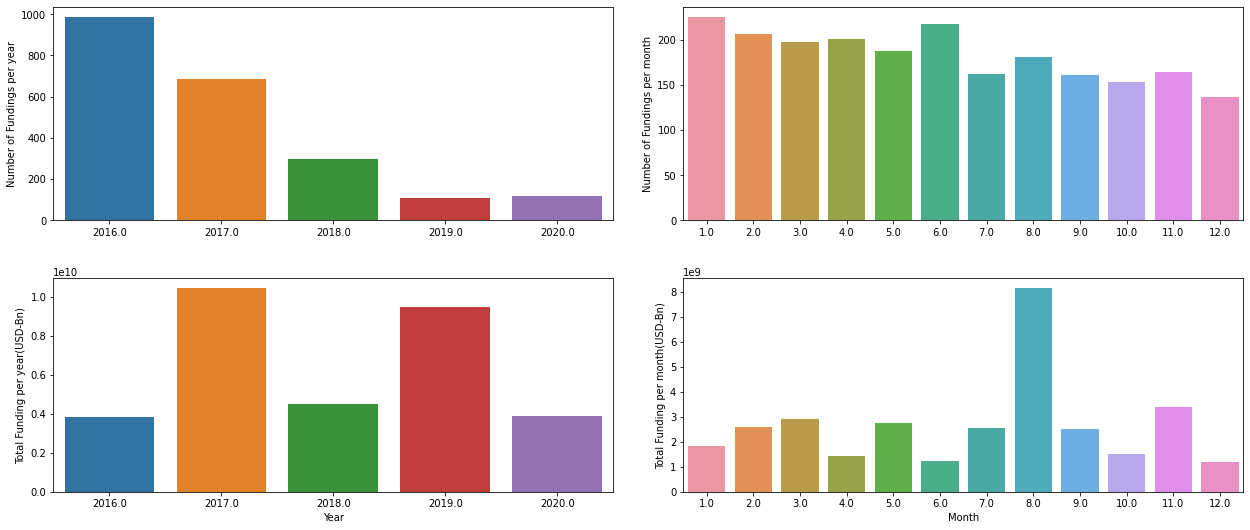

In [35]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,8))

sns.barplot(x=per_year_funding.index, y=per_year_funding['Number of Fundings per year'], data=per_year_funding, ax=axes[0,0], orient='v')
sns.barplot(x=per_month_funding.index, y=per_month_funding['Number of Fundings per month'], data=per_month_funding, ax=axes[0,1], orient='v')

sns.barplot(x=funding_total_yr.index, y=funding_total_yr['Total Funding per year(USD-Bn)'], data=funding_total_yr, ax=axes[1,0], orient='v')
sns.barplot(x=funding_total_month.index, y=funding_total_month['Total Funding per month(USD-Bn)'], data=funding_total_month, ax=axes[1,1], orient='v')

fig.tight_layout(pad=3)
plt.show()

In [36]:
###Role of city in funding

In [37]:
fundings_count_city = pd.DataFrame(startup_data['CityLocation'].value_counts().sort_values(ascending=False)[:10])
fundings_count_city.rename(columns={'CityLocation':'Number of Fundings by City'}, inplace=True)

funding_total_city = pd.DataFrame(startup_data.groupby('CityLocation')['Amount'].sum()).sort_values(by="Amount", ascending=False)[:10]
funding_total_city.rename(columns={'Amount':'Amount of Funding by City(USD-Bn)'}, inplace=True)


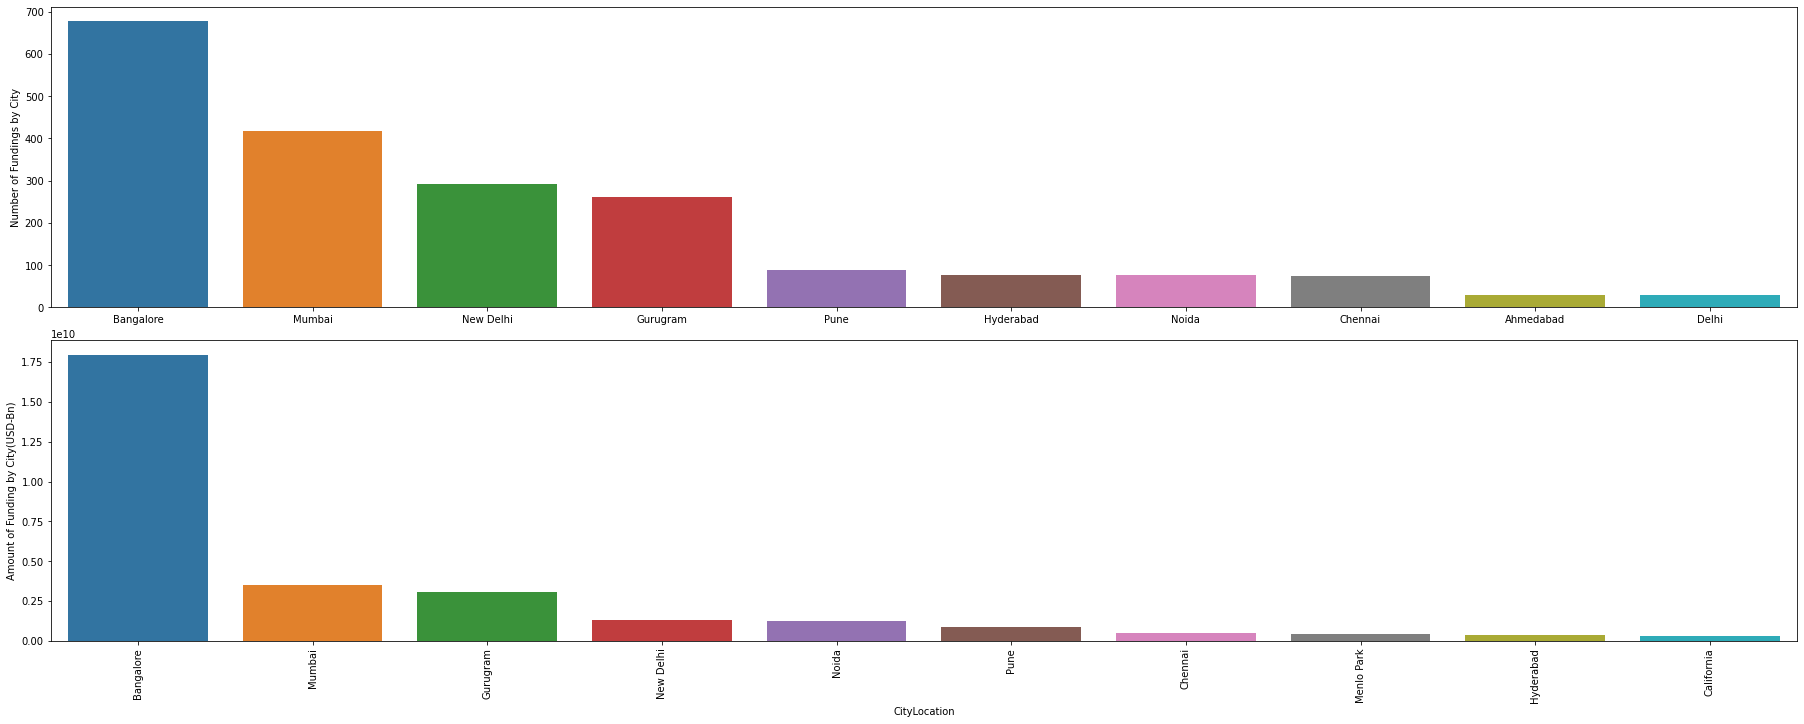

In [38]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(25, 10))

sns.barplot(x=fundings_count_city.index, y=fundings_count_city['Number of Fundings by City'], data=fundings_count_city, ax=axes[0])
sns.barplot(x=funding_total_city.index, y=funding_total_city['Amount of Funding by City(USD-Bn)'], data=funding_total_city, ax=axes[1]).set_xticklabels(rotation=90, labels=funding_total_city.index)

fig.tight_layout(pad=0.5)
plt.show()

In [39]:
###Industries favoured by investors

In [40]:
fundings_count_industry = pd.DataFrame(startup_data['Industry'].value_counts().sort_values(ascending=False))[:15]
fundings_count_industry.rename(columns={'Industry':'Number of Fundings by Industry'}, inplace=True)


funding_total_industry = pd.DataFrame(startup_data.groupby('Industry')['Amount'].sum()).sort_values(by="Amount", ascending=False)[:15]
funding_total_industry.rename(columns={'Amount':'Amount of Funding by Industry(USD-Bn)'}, inplace=True)




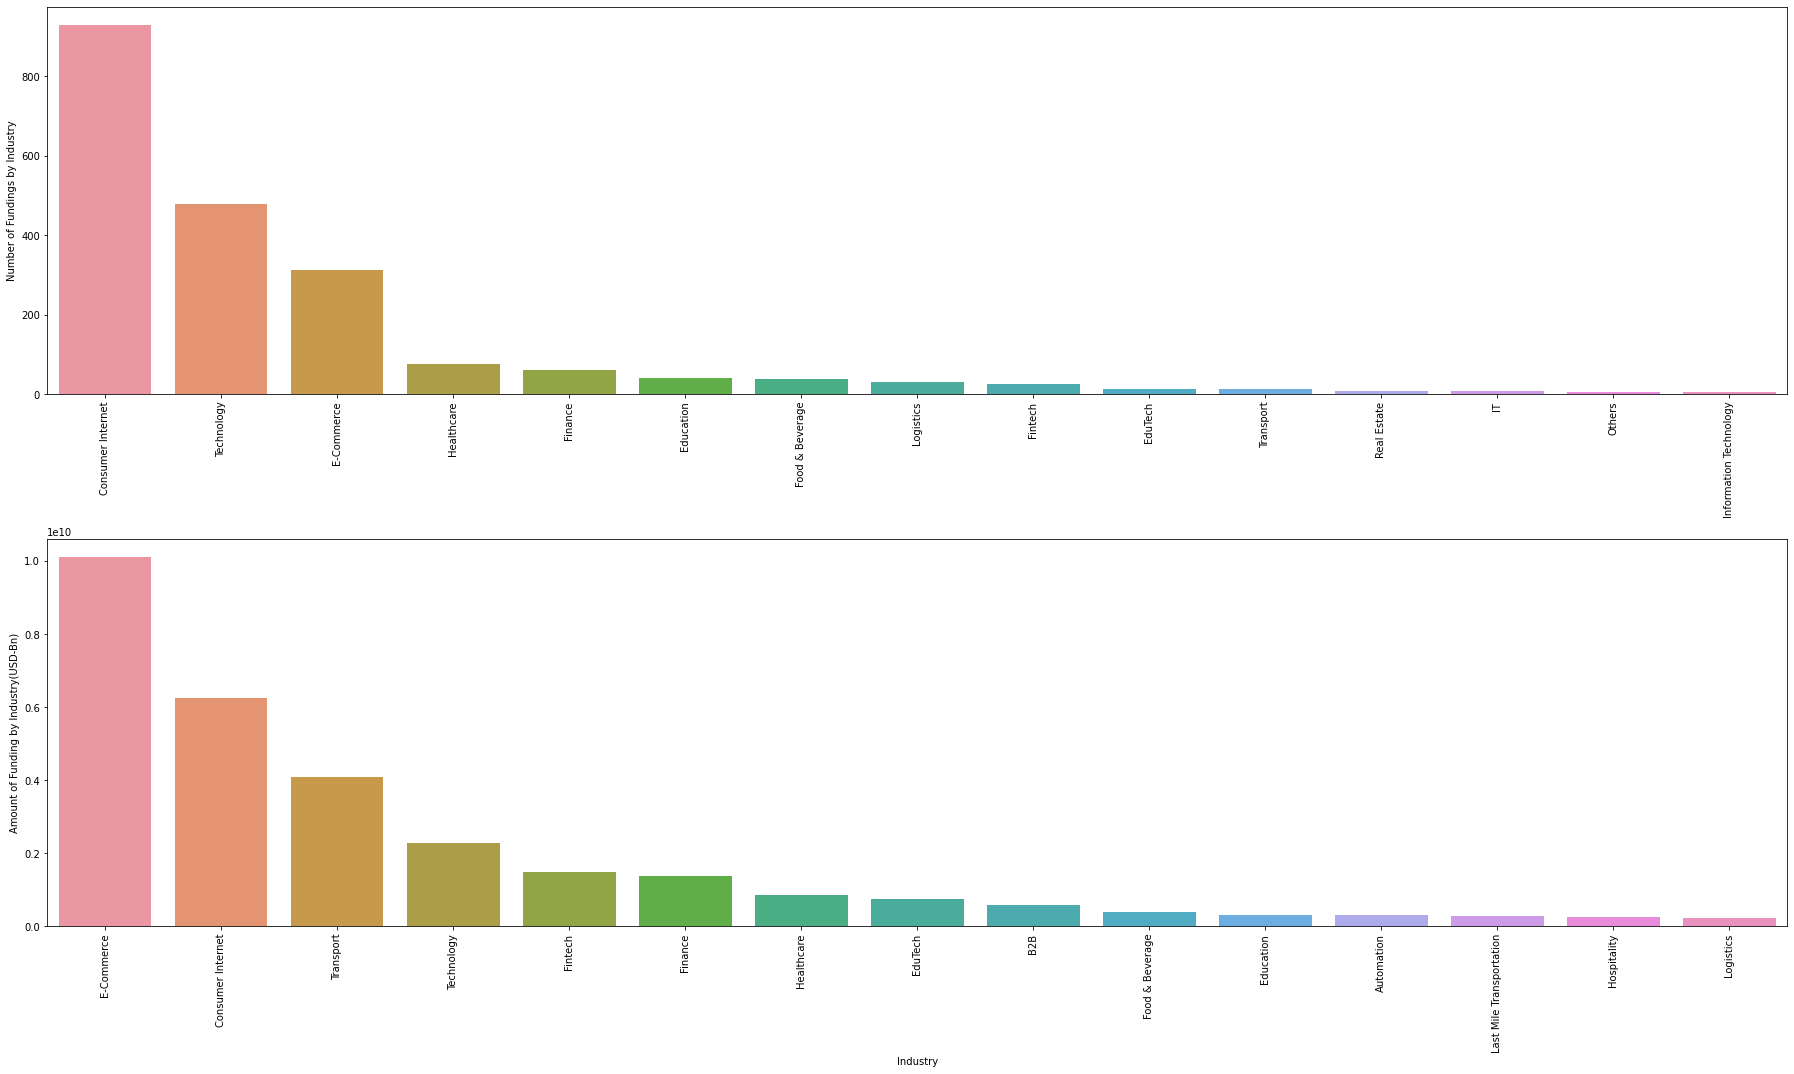

In [41]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(25, 15))

sns.barplot(x=fundings_count_industry.index, y=fundings_count_industry['Number of Fundings by Industry'], data=fundings_count_industry, ax=axes[0]).set_xticklabels(rotation=90, labels=fundings_count_industry.index)
sns.barplot(x=funding_total_industry.index, y=funding_total_industry['Amount of Funding by Industry(USD-Bn)'], data=funding_total_industry, ax=axes[1]).set_xticklabels(rotation=90, labels=funding_total_industry.index)

fig.tight_layout(pad=1)
plt.xticks(rotation=90)
plt.show()

In [42]:
###Important Investors in India

In [43]:
funding_count_investor = pd.DataFrame(startup_data['InvestorName'].value_counts()).sort_values(by='InvestorName', ascending=False)[:10]
funding_count_investor.rename(columns={'InvestorName': 'Number of Investments by Investor'}, inplace=True)
funding_count_investor.drop(funding_count_investor[funding_count_investor.index == 'Undisclosed Investors'].index, inplace=True)


In [44]:
funding_total_investor = pd.DataFrame(startup_data.groupby(['InvestorName'])['Amount'].sum()).sort_values(by="Amount", ascending=False)[:15]
funding_total_investor.rename(columns={'Amount':'Total Funding by Investor(USD-Bn)'}, inplace=True)


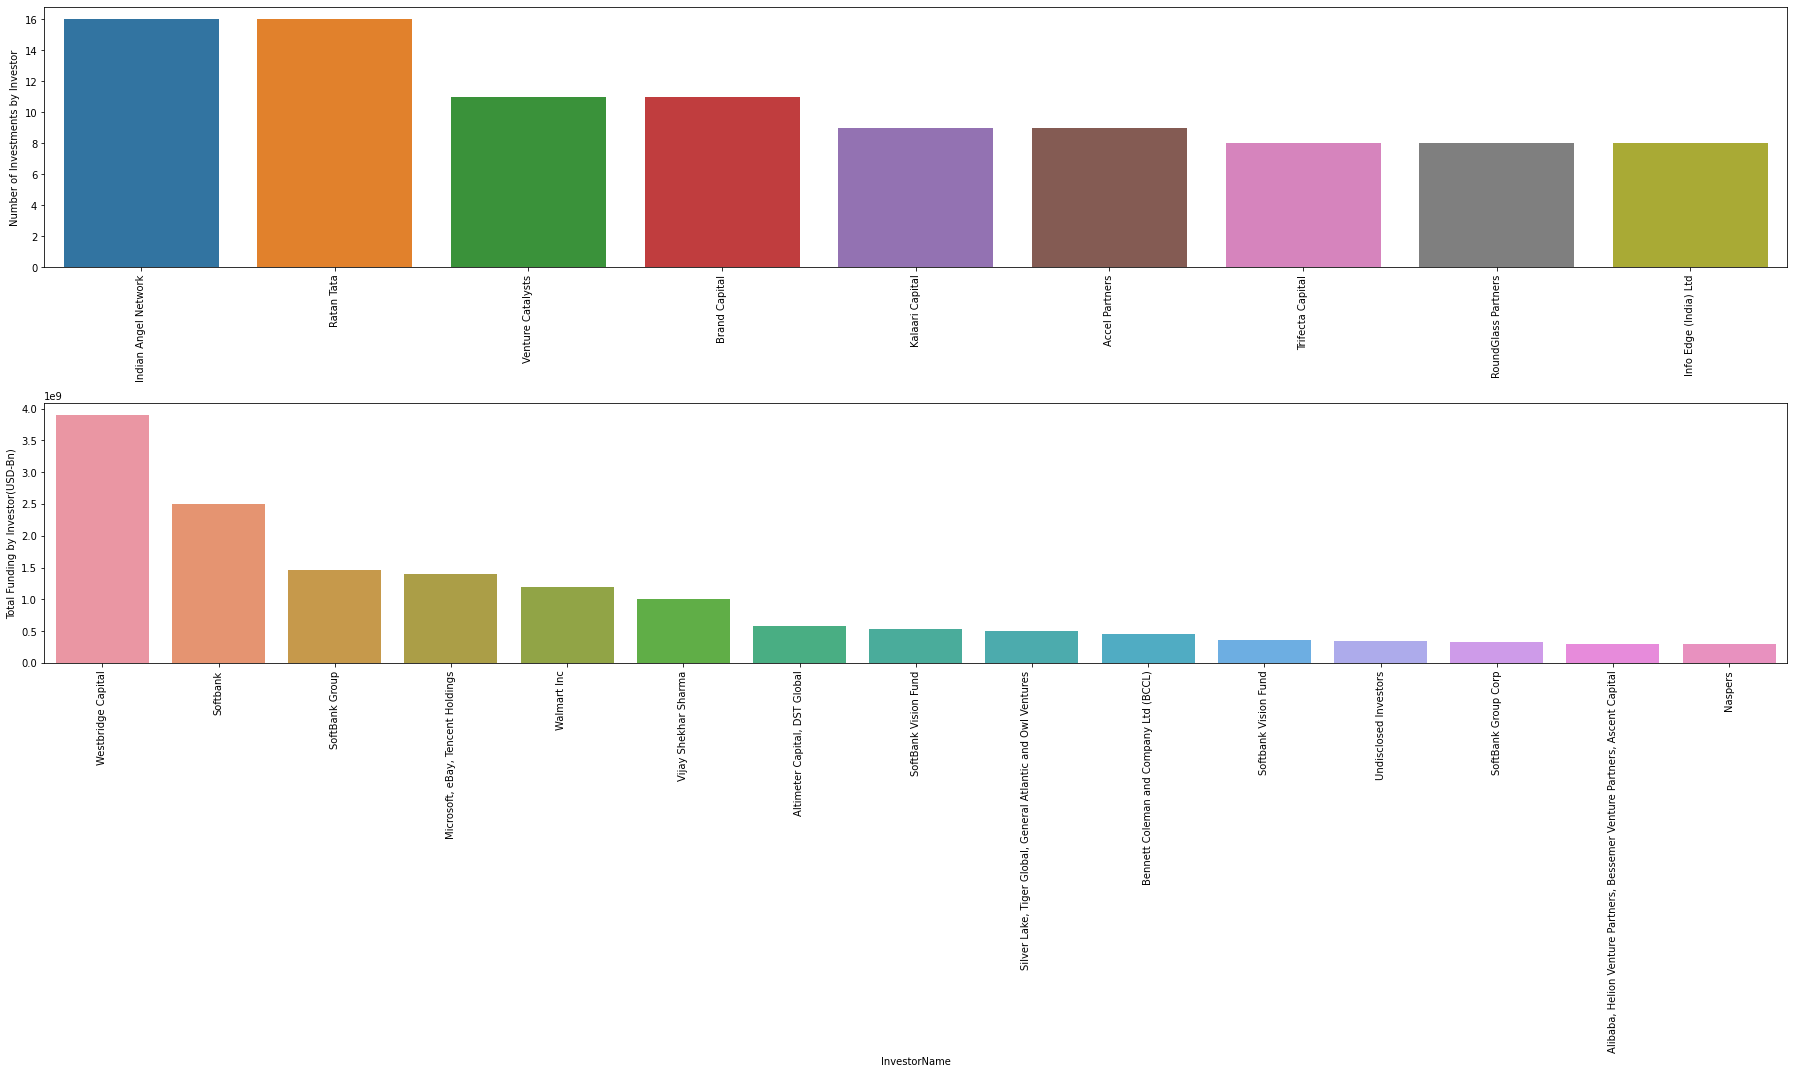

In [45]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(25, 15))

sns.barplot(x=funding_count_investor.index, y=funding_count_investor['Number of Investments by Investor'], data=funding_count_investor, ax=axes[0]).set_xticklabels(rotation=90, labels=funding_count_investor.index)
sns.barplot(x=funding_total_investor.index, y=funding_total_investor['Total Funding by Investor(USD-Bn)'], data=funding_total_investor, ax=axes[1]).set_xticklabels(rotation=90, labels=funding_total_investor.index)

fig.tight_layout(pad=1)
plt.show()

In [46]:
###Funds startups generally get in india

In [47]:
funding_count_company = pd.DataFrame(startup_data['StartupName'].value_counts()).sort_values(by='StartupName', ascending=False)[:15]
funding_count_company.rename(columns={'StartupName': 'Number of Investments by Investor'}, inplace=True)


In [48]:
funding_total_company = pd.DataFrame(startup_data.groupby('StartupName')['Amount'].sum()).sort_values(by='Amount', ascending=False)[:15]
funding_total_company.rename(columns={'Amount': "Total amount Raised by Startup (USD-Bn)"}, inplace=True)


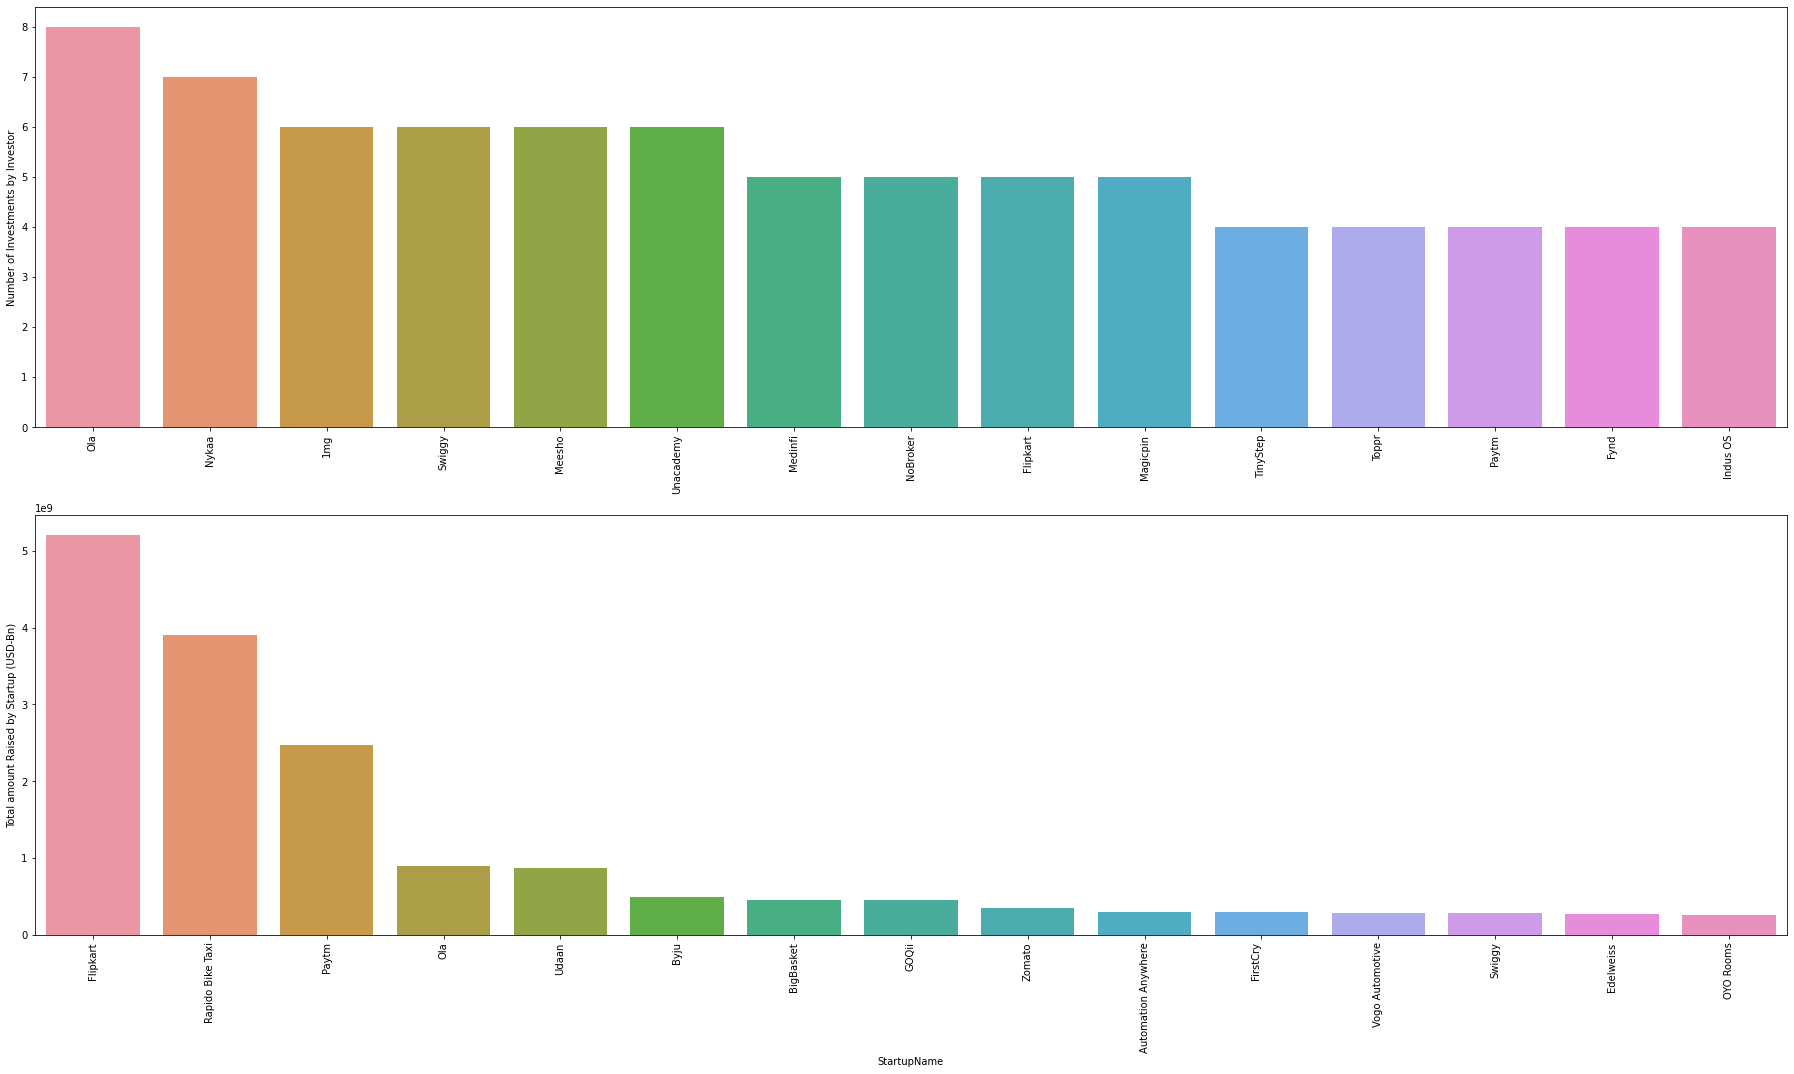

In [49]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(25, 15))

sns.barplot(x=funding_count_company.index, y=funding_count_company['Number of Investments by Investor'], data=funding_count_company, ax=axes[0]).set_xticklabels(rotation=90, labels=funding_count_company.index)
sns.barplot(x=funding_total_company.index, y=funding_total_company['Total amount Raised by Startup (USD-Bn)'], data=funding_total_company, ax=axes[1]).set_xticklabels(rotation=90, labels=funding_total_company.index)

fig.tight_layout(pad=1)
plt.show()